In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
def randomdirection(x,y):
    r=random.randint(1,8)
    if(r==1):
        x=x+1
    if(r==2):
        y=y+1
    if(r==3):
        x=x-1
    if(r==4):
        y=y-1
    if(r==5):
        x=x+1
        y=y+1
    if(r==6):
        x=x+1
        y=y-1
    if(r==7):
        x=x-1
        y=y+1
    if(r==8):
        x=x-1
        y=y-1
    return x,y    

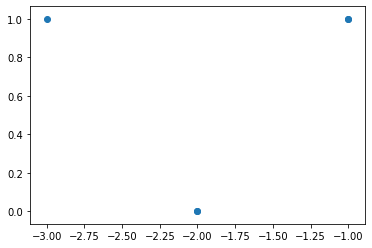

In [2]:
X=[]
Y=[]
changex=0
changey=0
for j in range(1):
    changex=0
    changey=0
    for i in range(5):
        T,V=randomdirection(0,0)
        changex=changex+T
        changey=changey+V
        X.append(changex)
        Y.append(changey)
    plt.scatter(X,Y)
    plt.show()

Deviation and circular path function

30.0
45.0 42.42640687119285
30.0 40.0 30.0


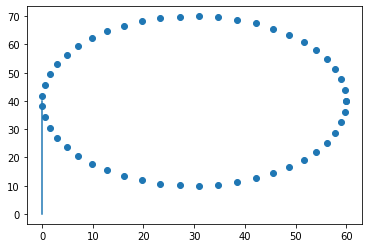

In [3]:
def path(X,Y,curx,cury,division,direction):
    xn=[]
    yn=[]
    distance=np.sqrt(((X-curx)**2)+((Y-cury)**2))
    theeta=(np.pi/2)-(np.arctan(abs((Y-y)/(X-x))))
    phi=(2*theeta*180/np.pi)/division
    R=(distance*np.sin((np.pi/2)-theeta))/np.sin(2*theeta)
    Angle=0
    Rx=X+(R*np.cos(Angle))
    Ry=Y+(R*np.sin(Angle))
    print(phi)
    print(theeta*180/np.pi,distance)
    print(Rx,Ry,R)
    q=np.linspace(0,360)
    xn.append(Rx+(R*np.cos(q*np.pi/180)))
    yn.append(Ry+(R*np.sin(q*np.pi/180)))
    plt.scatter(xn,yn)
    plt.plot((0,0),(0,40))
    plt.show()
X=0
Y=40
x=30
y=10
direction=-1/np.Infinity
path(X,Y,x,y,3,direction)

The Tensor transformation effort

In [4]:
def path(points):
    direction=30*np.pi/180
    tensor=np.array([[np.cos(direction),-1*np.sin(direction)],[np.sin(direction),np.cos(direction)]])
    point=np.multiply(tensor,points)
    return(point)
r=[]
for i in range(100):
    r.append(path(i))

This is the second try for the finding the solution to the problem,
Optimization condition : the distance of the problem should be less and the time also
Constraints are going to be the angle of turn and the distance of the line s in the curves.

making the Velocity Vector,Velocity Vector orientation, Missile Orientation

In [5]:
import numpy as np

#def VelocityVector(dvx,dvy):
#    VelocityVectorX=dvx
#    VelocityVectorY=dvy
#    X.append(dvx)
#    Y.append(dvy)
#    return VelocityVectorX,VelocityVectorY
CurrentPositionX=1
CurrentPositionY=1
def TargetOrientation(TargetX,TargetY):
    RadianTarget=0
    if (TargetX>=0.0 and TargetY>=0.0):               #First Quadrant
        RadianTarget=np.arctan(TargetY/TargetX) 
    if (TargetX<=0.0 and TargetY>=0.0):               #Second Quadrant
        RadianTarget=np.pi+np.arctan(TargetY/TargetX)
    if (TargetX<=0.0 and TargetY<=0.0):               #Third Quadrant
        RadianTarget=np.pi+np.arctan(TargetY/TargetX)
    if (TargetX>=0.0 and TargetY<=0.0):               #Fourth Quadrant
        RadianTarget=(2*np.pi)+np.arctan(TargetY/TargetX)
    return RadianTarget

def MissileOrientation(VelocityVectorX,VelocityVectorY):
    RadianMissile=0
    if (VelocityVectorX>=0.0 and VelocityVectorY>=0.0):                   #First Quadrant
        RadianMissile=np.arctan(VelocityVectorY/VelocityVectorX) 
    if (VelocityVectorX<=0.0 and VelocityVectorY>=0.0):           #Second Quadrant
        RadianMissile=np.pi+np.arctan(VelocityVectorY/VelocityVectorX)
    if (VelocityVectorX<=0.0 and VelocityVectorY<=0.0):           #Third Quadrant
        RadianMissile=np.pi+np.arctan(VelocityVectorY/VelocityVectorX)
    if (VelocityVectorX>=0.0 and VelocityVectorY<=0.0):                   #Fourth Quadrant 
        RadianMissile=(2*np.pi)+np.arctan(VelocityVectorY/VelocityVectorX)
    #print(RadianMissile)
    return RadianMissile

def TurnHere(RadianTarget,RadianMissile):
    if (RadianMissile<=np.pi):
        if (RadianTarget>RadianMissile+(np.pi) and RadianTarget>RadianMissile):
            #print("Turn Right")
            return (1)
        if (RadianTarget>RadianMissile):
            #print("Trun Left")
            return (-1)
        if (RadianTarget<RadianMissile): 
            #print("Turn Right")
            return (1)
    if(RadianMissile>=np.pi):
        if(RadianTarget<RadianMissile and RadianTarget<RadianMissile-np.pi):
            #turn left
            return(-1)
        if(RadianTarget<RadianMissile):
            #turn Right
            return(1)
        if(RadianTarget>RadianMissile):
            #turn left
            return(-1)        

Making the rotation tensor for the Missile vector

Target Hit
376


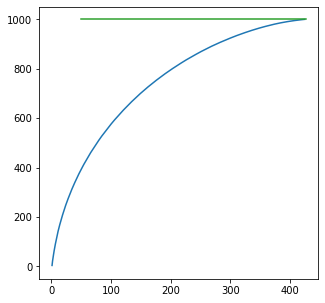

In [87]:
import random
import numpy as np
incremental=0.85*np.pi/180 #2,3,4,5,6,7,8,9,10,11
def rotationTensor(TurnHereCommand,dvx,dvy):
    if (TurnHereCommand==-1):
        Nx=(dvx*np.cos(incremental))-(dvy*np.sin(incremental))
        Ny=(dvx*np.sin(incremental))+(dvy*np.cos(incremental))
        dvx=Nx
        dvy=Ny
    else:
        Nx=(dvx*np.cos(-1*incremental))-(dvy*np.sin(-1*incremental))
        Ny=(dvx*np.sin(-1*incremental))+(dvy*np.cos(-1*incremental))
        dvx=Nx
        dvy=Ny
    return Nx,Ny
dvx=0.01
dvy=np.sqrt(1-dvx**2)
#TargetX=100
#TargetY=-10.5
X=[]
Y=[]
CurrentPositionX=1
CurrentPositionY=1
Tx=[]
Ty=[]
for t in range(100000):
    TargetX=(50)+(t)
    TargetY=1000
    Tx.append(TargetX)
    Ty.append(TargetY)
    #i,j=VelocityVector(1,0)
    AngleTarget=TargetOrientation(TargetX-CurrentPositionX,TargetY-CurrentPositionY)
    #print(AngleTarget*180/np.pi)
    AngleMissile = MissileOrientation(dvx,dvy)
    #print(AngleMissile*180/np.pi,AngleTarget*180/np.pi)
    TurnHereCommand = TurnHere(AngleTarget,AngleMissile)
    #print(TurnHereCommand)
    dvx,dvy=rotationTensor(TurnHereCommand,dvx,dvy)
    #print(dvx,dvy)
    #print(VelocityVectorX,VelocityVectorY)
    CurrentPositionX=CurrentPositionX+dvx*3.02
    CurrentPositionY=CurrentPositionY+dvy*3.02
    #print(CurrentPositionX,CurrentPositionY)
    X.append(CurrentPositionX)
    Y.append(CurrentPositionY)
    if (np.sqrt((TargetX-CurrentPositionX)**2+(TargetY-CurrentPositionY)**2)<=3):
        print("Target Hit")
        print(t)
        break
plt.figure(figsize=(5,5))        
plt.plot(X,Y,1,1)
plt.plot(Tx,Ty,10,0)
plt.show()    
#print(X)
#print(Y)